In [28]:
import pandas as pd   ## Libreria para manipular y analizar datos
import matplotlib.pyplot as plt  ## Libreria para visualizar
import seaborn as sns   ## Libreria para visualizar
import numpy as np  ## Libreria para operaciones numéricas
import plotly  ## Libreria para visualizaciones interactivas
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import skew, kurtosis  ## funciones estadísticas
from scipy.stats import norm ## distribución normal
from scipy.stats import poisson ## distribución Poisson
from scipy.stats import t ## distribución t
from scipy.stats import f ## distribución F
from scipy.stats import ttest_1samp  ## Prueba t una población
from scipy.stats import ttest_ind ## Prueba t comparación medias
from scipy.stats import shapiro ## Prueba normalidad Shapiro-Wilks
from scipy.stats import anderson ## Prueba normalidad Anderson-Darling
from scipy.stats import levene ## Prueba homogeneidad de varianzas Levene
from scipy.stats import mannwhitneyu ## Prueba Mann-Whitney-Wilcoxon (comparación dos poblaciones)
from scipy.stats import f_oneway ## Prueba ANOVA de una vía
from scipy.stats import chi2_contingency ## Prueba chi cuadrado de Pearson
from scipy.stats import pearsonr ## Coeficiente de correlación de Pearson con prueba
import statsmodels.stats as sm  ## estadísticas
import statsmodels.api as sm1  ## estadísticas
from statsmodels.graphics.gofplots import qqplot ## Gráfico QQ plot
import pingouin as pg ## Librería funciones estadísticas

1. Pregunta SMART:
¿Cuál es el comportamiento que tienen los resultados de indicadores homonales de los hombres y mujeres en el desarrollo de enfermedad en la tiroides?

Específica
Medible
Accionable
Relevante
Tiempo


2. Obtener Datos

3. Analizar Estructura
- visualizar tabla

In [29]:
## 3. Analizar Estructura
## Cargo los datos
data = pd.read_csv("hypothyroid.csv")
data

,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,TT4measured,T4,T4Umeasured,T4U,FTImeasured,FTI,TBGmeasured,TBG,referral source,binaryClass
0,12,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,?,SVHC,P
1,20,M,f,f,f,f,f,f,f,f,...,t,102.0,f,0.00,f,0.0,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175.0,f,0.00,f,0.0,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,30,F,f,f,f,f,f,f,f,f,...,f,0.0,f,0.00,f,0.0,f,?,other,P
3766,68,F,f,f,f,f,f,f,f,f,...,t,124.0,t,1.08,t,114.0,f,?,SVI,P
3767,74,F,f,f,f,f,f,f,f,f,...,t,112.0,t,1.07,t,105.0,f,?,other,P
3768,72,M,f,f,f,f,f,f,f,f,...,t,82.0,t,0.94,t,87.0,f,?,SVI,P


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3770 entries, 0 to 3769
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3770 non-null   int64  
 1   sex                      3620 non-null   object 
 2   thyroxine                3770 non-null   object 
 3   queryonthyroxine         3770 non-null   object 
 4   onantithyroidmedication  3770 non-null   object 
 5   sick                     3770 non-null   object 
 6   pregnant                 3770 non-null   object 
 7   thyroidsurgery           3770 non-null   object 
 8   I131treatment            3770 non-null   object 
 9   queryhypothyroid         3770 non-null   object 
 10  queryhyperthyroid        3770 non-null   object 
 11  lithium                  3770 non-null   object 
 12  goitre                   3770 non-null   object 
 13  tumor                    3770 non-null   object 
 14  hypopituitary           

4. Dividir Variables

Categóricas: Sexo, Tiroxina, Queriontiroxina, Onan..., Enfermo, Embarazado, Cirugía de tiroides, en tratamiento, mediciones TT4, T4, FTI, TBG, Clase Binaria

Numéricas: Edad, T4, T4U, FTI, TBG

5. Análisis Univariado Categóricas
- Limpieza de data (Reemplazar valores "?" por NaN)
- Limpieza de data (Reemplazar valores booleanos por 1 y 0)
- Verificar valores perdidos o nulos dentro de la data

In [31]:
#
data.replace("?", np.nan, inplace = True)
data.head(5)

,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,TT4measured,T4,T4Umeasured,T4U,FTImeasured,FTI,TBGmeasured,TBG,referral source,binaryClass
0,12,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,P
1,20,M,f,f,f,f,f,f,f,f,...,t,102.0,f,0.00,f,0.0,f,NaN,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175.0,f,0.00,f,0.0,f,NaN,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,P


In [32]:
#Reemplazo de datos de falso o verdadero por 0 y 1 respectivamente
data['thyroxine'] = data['thyroxine'].replace({"t": 1, "f": 0})
data['thyroxine'] = data['thyroxine'].astype(int)

data['queryonthyroxine'] = data['queryonthyroxine'].replace({"t": 1, "f": 0})
data['queryonthyroxine'] = data['queryonthyroxine'].astype(int)

data['onantithyroidmedication'] = data['onantithyroidmedication'].replace({"t": 1, "f": 0})
data['onantithyroidmedication'] = data['onantithyroidmedication'].astype(int)

data['sick'] = data['sick'].replace({"t": 1, "f": 0})
data['sick'] = data['sick'].astype(int)

data['pregnant'] = data['pregnant'].replace({"t": 1, "f": 0})
data['pregnant'] = data['pregnant'].astype(int)

data['thyroidsurgery'] = data['thyroidsurgery'].replace({"t": 1, "f": 0})
data['thyroidsurgery'] = data['thyroidsurgery'].astype(int)

data['I131treatment'] = data['I131treatment'].replace({"t": 1, "f": 0})
data['I131treatment'] = data['I131treatment'].astype(int)

data['queryhypothyroid'] = data['queryhypothyroid'].replace({"t": 1, "f": 0})
data['queryhypothyroid'] = data['queryhypothyroid'].astype(int)

data['TBGmeasured'] = data['TBGmeasured'].replace({"t": 1, "f": 0})
data['TBGmeasured'] = data['TBGmeasured'].astype(int)

data['FTImeasured'] = data['FTImeasured'].replace({"t": 1, "f": 0})
data['FTImeasured'] = data['FTImeasured'].astype(int)

data['binaryClass'] = data['binaryClass'].replace({"P": 1, "N": 0})
data['binaryClass'] = data['binaryClass'].astype(int)

In [33]:
data.head(5)

,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,TT4measured,T4,T4Umeasured,T4U,FTImeasured,FTI,TBGmeasured,TBG,referral source,binaryClass
0,12,F,0,0,0,0,0,0,0,0,...,t,125.0,t,1.14,1,109.0,0,NaN,SVHC,1
1,20,M,0,0,0,0,0,0,0,0,...,t,102.0,f,0.00,0,0.0,0,NaN,other,1
2,46,M,0,0,0,0,0,0,0,0,...,t,109.0,t,0.91,1,120.0,0,NaN,other,1
3,70,F,1,0,0,0,0,0,0,0,...,t,175.0,f,0.00,0,0.0,0,NaN,other,1
4,70,F,0,0,0,0,0,0,0,0,...,t,61.0,t,0.87,1,70.0,0,NaN,SVI,1


In [34]:
#Verificar valores perdidos
missing_data = data.isnull()
missing_data.head(5)

,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,TT4measured,T4,T4Umeasured,T4U,FTImeasured,FTI,TBGmeasured,TBG,referral source,binaryClass
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [35]:
data.isna().sum()

Age                           0
sex                         150
thyroxine                     0
queryonthyroxine              0
onantithyroidmedication       0
sick                          0
pregnant                      0
thyroidsurgery                0
I131treatment                 0
queryhypothyroid              0
queryhyperthyroid             0
lithium                       0
goitre                        0
tumor                         0
hypopituitary                 0
psych                         0
TSHmeasured                   0
TSH                           0
T3measured                    0
T3                            0
TT4measured                   0
T4                            0
T4Umeasured                   0
T4U                           0
FTImeasured                   0
FTI                           0
TBGmeasured                   0
TBG                        3770
referral source               0
binaryClass                   0
dtype: int64

Analizando los valores perdidos me di cuenta que los valores que contienen NaN son 150 personas en su sexo y también que ninguna de las 3770 personas tiene exámen de TBG

In [36]:
## Función para construir tablas de frecuencias
def tabla_freq(columna):
    x=pd.crosstab(index=columna,columns="count").reset_index()
    x=x.rename(columns={'count':'Frec. Abs.'})
    y=pd.crosstab(index=columna,columns="count", normalize='columns').reset_index()
    y=y.rename(columns={'count':'Frec. Rel.'})
    tabla=x.merge(y,how='left')
    tabla.rename_axis(None, axis=1)
    return tabla

In [37]:
tabla_aprob = tabla_freq(data['sex'])
tabla_aprob

col_0,sex,Frec. Abs.,Frec. Rel.
0,F,2477,0.684254
1,M,1143,0.315746


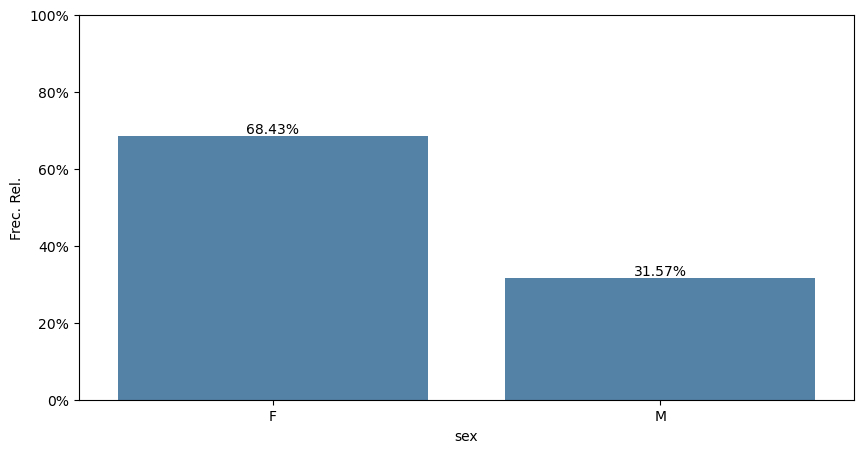

In [41]:
plt.figure(figsize=(10,5)) 
frec_aprob=sns.barplot(x=tabla_aprob['sex'],y=tabla_aprob["Frec. Rel."]*100, color="steelblue") ## aquí es el cambio
frec_aprob.bar_label(frec_aprob.containers[0], label_type='edge',fmt='%.2f%%')  
frec_aprob.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) 
frec_aprob.set(ylim=(0, 100))
plt.show()  

Se puede observar que la información principalmente contiene información de mujeres. Podría profundizarse si los problemas de tiroides son más propensos de ocurrir en las mujeres que en los hombres
Otra posible pregunta a investigar --> aunque se necesitaria otras bases de datos posiblemente, no solo este dataset podría responder esta pregunta

6. Análisis univariado numérico

In [9]:
print("Medición T4 Libre")
data_grupo = data.groupby("sex")
#Tabla descriptiva para variable T4 libre (FTI)
tabla1 = pd.DataFrame(data_grupo['FTI'].describe())
tabla1 = tabla1.assign(coef_variation= tabla1['std']/tabla1['mean'])
for grupo in data_grupo:
    tabla1.loc[grupo[0], 'skew'] = grupo[1]['FTI'].skew()
    tabla1.loc[grupo[0], 'kurtosis'] = grupo[1]['FTI'].kurtosis()        
tabla1

Medición T4 Libre


,count,mean,std,min,25%,50%,75%,max,coef_variation,skew,kurtosis
sex,,,,,,,,,,,
F,2477.0,98.848244,48.070702,0.0,84.0,103.0,123.0,395.0,0.486308,-0.125324,2.139706
M,1143.0,99.779528,39.513952,0.0,90.0,105.0,120.0,349.0,0.396013,-0.721250,2.845443


Explicación Coeficiente de Variación, Skew y Kurtosis: 

El coeficiente de variación de los datos indica que la media aritmética no es representativa en el conjunto de datos segmentados por sexo.
El Skew indica que los datos cuentan con una distribución sesgada a la derecha. 
La Kurtosis indica una elevación relativa en la distribución de los datos.

In [11]:
print("Medición T4 Libre")
#Tabla descriptiva para variable T4 libre (FTI)
tabla2 = pd.DataFrame(data['FTI'].describe())
tabla2

Medición T4 Libre


,FTI
count,3770.000000
mean,99.176844
std,45.851205
min,0.000000
25%,86.250000
50%,104.000000
75%,121.000000
max,395.000000


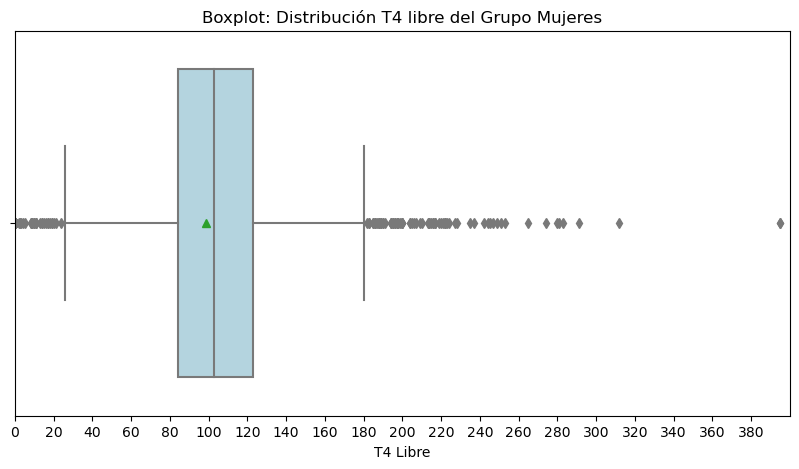

In [12]:
data_1 = data[data["sex"] == "F"]
plt.figure(figsize=(10,5)) 
boxplot_data_1=sns.boxplot(x=data_1['FTI'],color="lightblue",showmeans=True) ## crea el boxplot
boxplot_data_1.set_xlabel('T4 Libre') ## cambia el título del eje x
boxplot_data_1.set_xlim(0, 400)                     ## cambia los límites del eje x
boxplot_data_1.set_xticks(range(0,400,20))               ## cambia los valores del eje x
boxplot_data_1.set_title('Boxplot: Distribución T4 libre del Grupo Mujeres')
plt.show()

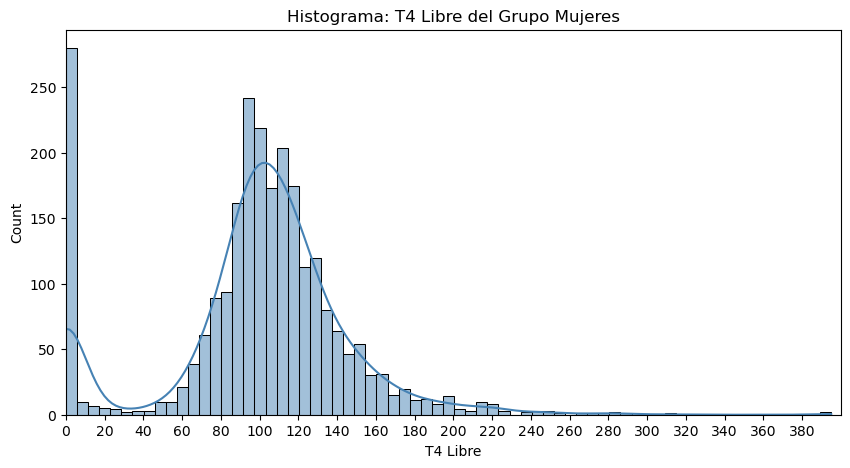

In [13]:
plt.figure(figsize=(10,5)) 
hist_data_1=sns.histplot(x=data_1['FTI'],kde=True,color="steelblue") ## crea el boxplot
hist_data_1.set_xlabel('T4 Libre') ## cambia el título del eje x
hist_data_1.set_xlim(0, 400)                     ## cambia los límites del eje x
hist_data_1.set_xticks(range(0,400,20))             ## cambia los valores del eje x
hist_data_1.set_title('Histograma: T4 Libre del Grupo Mujeres')
plt.show()

Con esto considero necesario eliminar todos los datos con valor 0 en este análisis, ya que no permite tener información sin sesgo. Afecta el conjunto de datos

In [14]:
data_grupoM = data[data["sex"] == "F"]
avg_mujer_FTI = data_grupoM["FTI"].astype("float").mean()

data_grupoM.loc[:, "FTI"] = data_grupoM["FTI"].fillna(avg_mujer_FTI)

#tuve que poner loc por lo siguiente
"""
Understanding the Warning:

Data Modification: You're trying to modify the values in the "FTI" column 
of the data_grupoM DataFrame.

Slicing: When you use data_grupoM["FTI"], you're actually creating a copy 
of that specific column. This is because pandas data access operations often 
return views or copies of the underlying data.

Modification on Copy: The fillna(avg_mujer_FTI) operation attempts to modify 
this copy, which triggers the warning. Pandas recommends modifying the original 
DataFrame instead of its copy for efficiency and clarity.

"""

'\nUnderstanding the Warning:\n\nData Modification: You\'re trying to modify the values in the "FTI" column \nof the data_grupoM DataFrame.\n\nSlicing: When you use data_grupoM["FTI"], you\'re actually creating a copy \nof that specific column. This is because pandas data access operations often \nreturn views or copies of the underlying data.\n\nModification on Copy: The fillna(avg_mujer_FTI) operation attempts to modify \nthis copy, which triggers the warning. Pandas recommends modifying the original \nDataFrame instead of its copy for efficiency and clarity.\n\n'

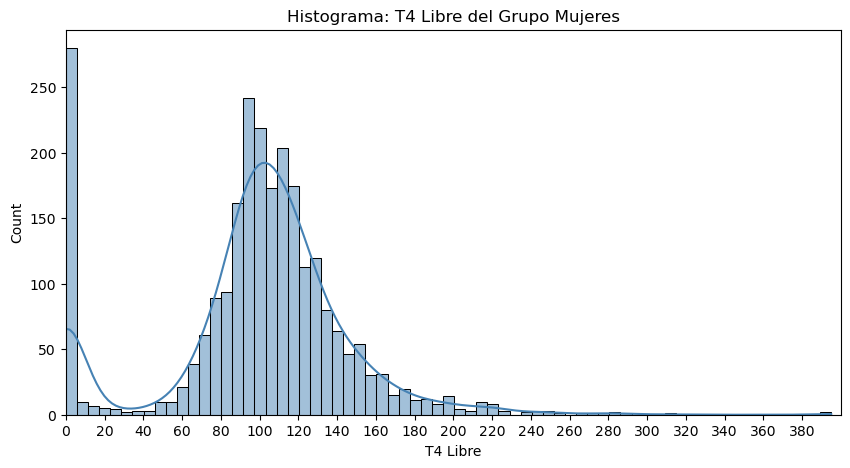

In [15]:
plt.figure(figsize=(10,5)) 
hist_data_2=sns.histplot(x=data_grupoM['FTI'],kde=True,color="steelblue") ## crea el boxplot
hist_data_2.set_xlabel('T4 Libre') ## cambia el título del eje x
hist_data_2.set_xlim(0, 400)                     ## cambia los límites del eje x
hist_data_2.set_xticks(range(0,400,20))             ## cambia los valores del eje x
hist_data_2.set_title('Histograma: T4 Libre del Grupo Mujeres')
plt.show()

In [16]:
data_grupoM['FTI'].value_counts()

FTI
0.0      275
100.0     49
97.0      45
93.0      44
95.0      41
        ... 
39.0       1
210.0      1
219.0      1
228.0      1
227.0      1
Name: count, Length: 219, dtype: int64

In [17]:
data2 = data
# Seleccionar filas sin valores en cero en la columna "FTI"
filas_sin_cero = data2["FTI"].isin([0])

# Eliminar filas con valores en cero
data2 = data2[~filas_sin_cero]

A la final me tocó eliminar los valores en cero porque a final de cuentas es gente que no se le ha tomado examenes

In [18]:
data2['FTI'].value_counts()

FTI
100.0    73
93.0     70
114.0    65
98.0     64
107.0    64
         ..
349.0     1
221.0     1
187.0     1
39.0      1
227.0     1
Name: count, Length: 234, dtype: int64

In [19]:
print("Medición T4 Libre")
data2_grupo = data2.groupby("sex")
#Tabla descriptiva para variable T4 libre (FTI)
tabla2 = pd.DataFrame(data2_grupo['FTI'].describe())
tabla2 = tabla2.assign(coef_variation= tabla2['std']/tabla2['mean'])
for grupo in data_grupo:
    tabla2.loc[grupo[0], 'skew'] = grupo[1]['FTI'].skew()
    tabla2.loc[grupo[0], 'kurtosis'] = grupo[1]['FTI'].kurtosis()        
tabla2

Medición T4 Libre


,count,mean,std,min,25%,50%,75%,max,coef_variation,skew,kurtosis
sex,,,,,,,,,,,
F,2202.0,111.193052,35.017563,2.0,92.0,107.0,125.75,395.0,0.314926,-0.125324,2.139706
M,1053.0,108.307692,27.755798,3.0,93.0,106.0,122.00,349.0,0.256268,-0.721250,2.845443


Al eliminar los valores en cero, se mejoran los coeficientes de variación y demás valores.

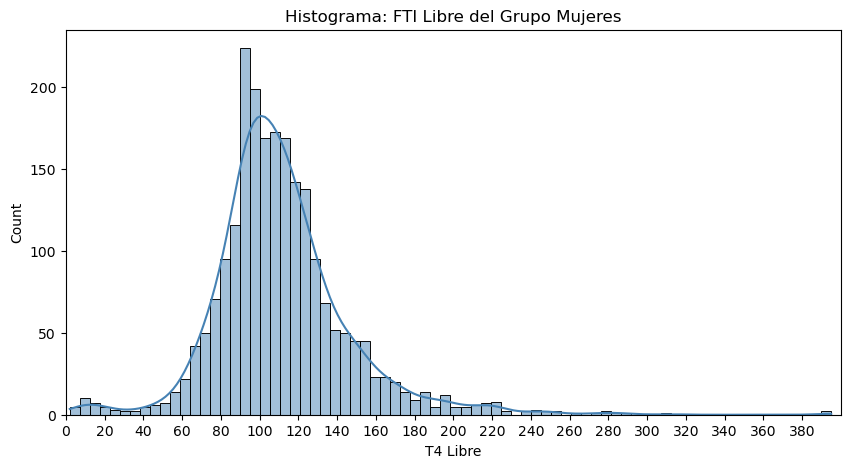

In [20]:
data_2 = data2[data2["sex"] == "F"]
plt.figure(figsize=(10,5)) 
hist_data_3=sns.histplot(x=data_2['FTI'],kde=True,color="steelblue") ## crea el boxplot
hist_data_3.set_xlabel('T4 Libre') ## cambia el título del eje x
hist_data_3.set_xlim(0, 400)                     ## cambia los límites del eje x
hist_data_3.set_xticks(range(0,400,20))             ## cambia los valores del eje x
hist_data_3.set_title('Histograma: FTI Libre del Grupo Mujeres')
plt.show()

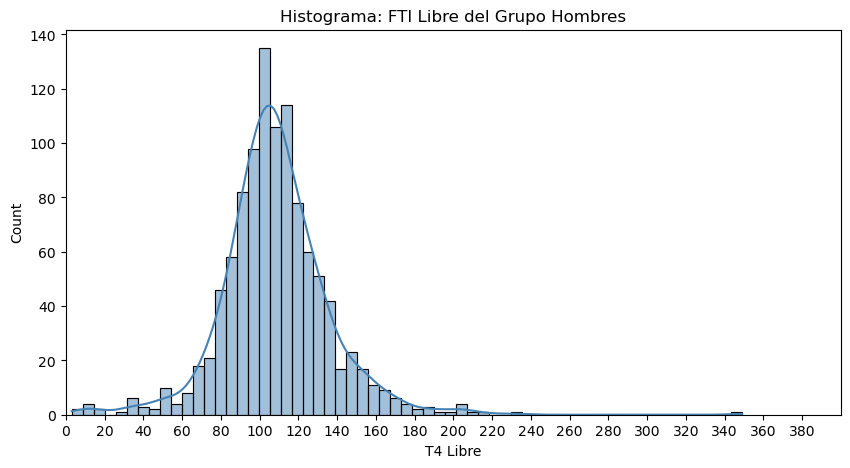

In [21]:
data_3 = data2[data2["sex"] == "M"]
plt.figure(figsize=(10,5)) 
hist_data_4=sns.histplot(x=data_3['FTI'],kde=True,color="steelblue") ## crea el boxplot
hist_data_4.set_xlabel('T4 Libre') ## cambia el título del eje x
hist_data_4.set_xlim(0, 400)                     ## cambia los límites del eje x
hist_data_4.set_xticks(range(0,400,20))             ## cambia los valores del eje x
hist_data_4.set_title('Histograma: FTI Libre del Grupo Hombres')
plt.show()

7. Analisis de Correlación

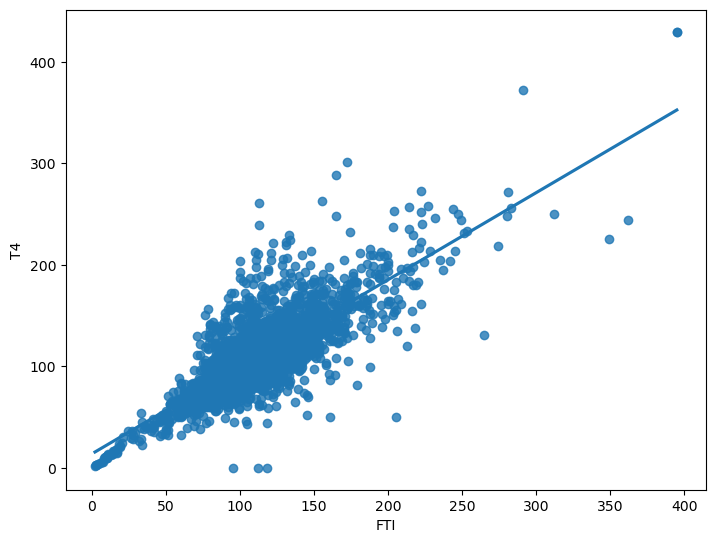

In [44]:
fig_sns = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax=sns.regplot(x=data2["FTI"],y=data2["T4"],ci=None)   
plt.ylabel('T4')  
plt.xlabel('FTI')         
plt.show()

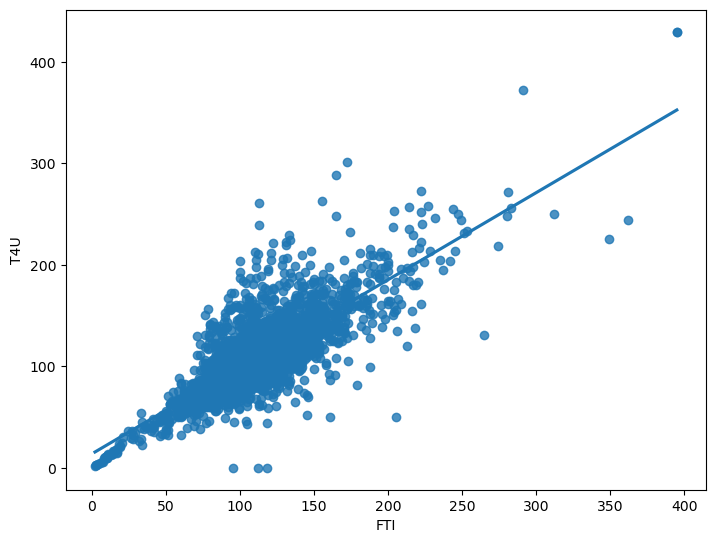

In [45]:
fig_sns = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax=sns.regplot(x=data2["FTI"],y=data2["T4"],ci=None)   
plt.ylabel('T4U')  
plt.xlabel('FTI')         
plt.show()

Estos gráficos de correlación significa que las variables T4 y T4U están correlacionadas con el FTI y según mi juicio se trata de una correlación lineal positiva